In [10]:
import modules.vae_nn
import modules.savefolders
import resources.sinusoidal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Generation Sinusoidal
Creates sinusoidal data points for training. 
**To do: Add better description**

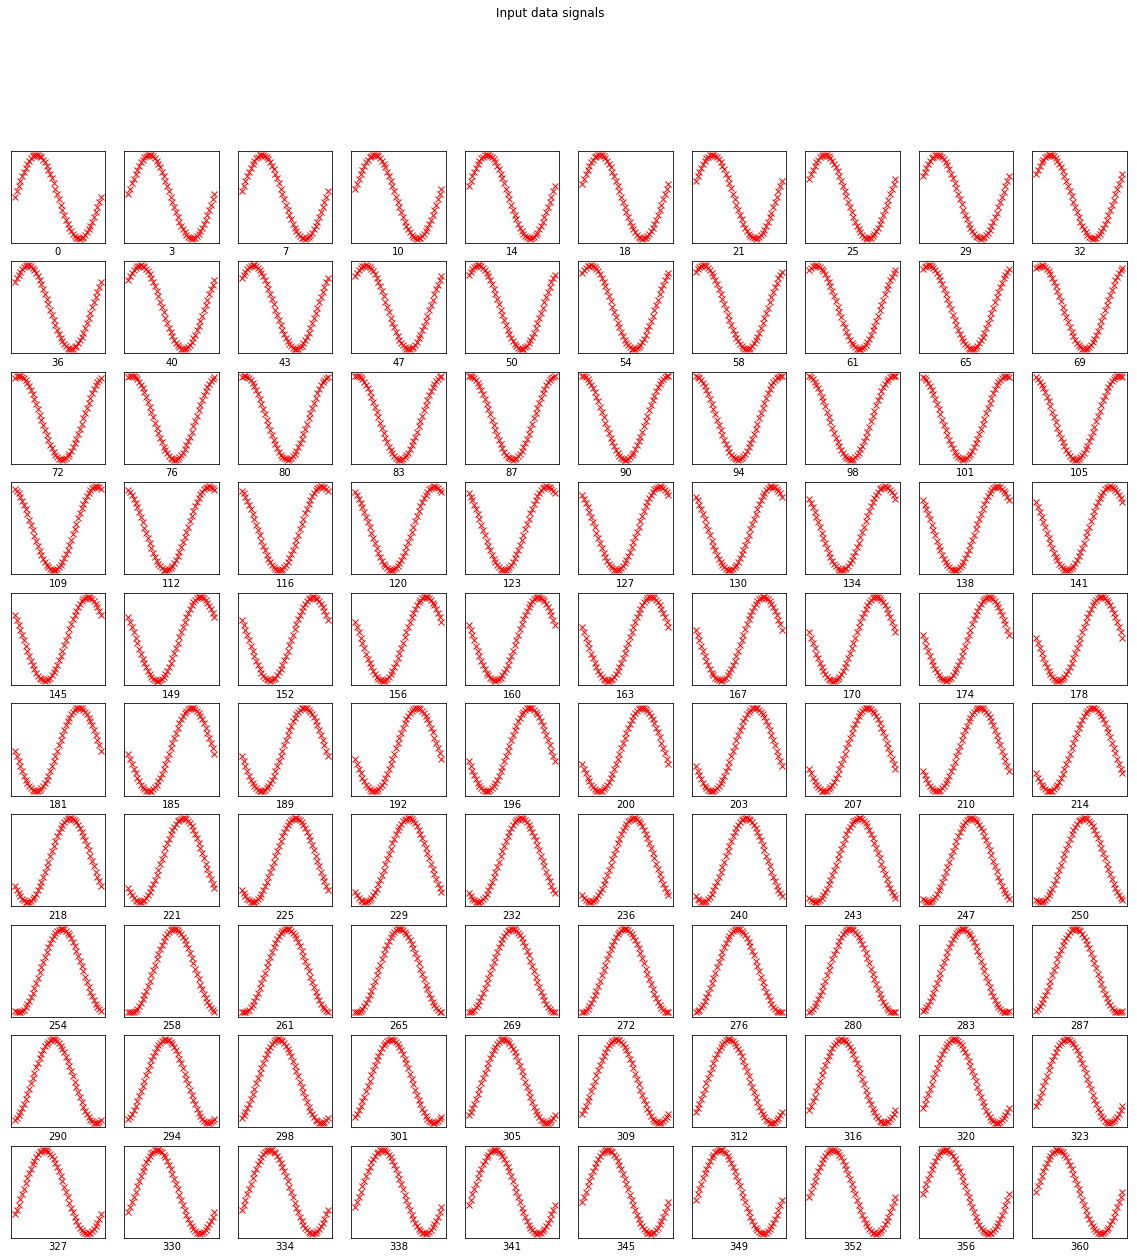

In [12]:
n_Phi = 100 # Number of data points
n_T = 50 # Dimension of sinusoidal data
omega = 2*np.pi # Angular frequency of signals
phase_range, time_range, signals = resources.sinusoidal.sinusoid_data_generation_1D(n_Phi, n_T, omega)

# PLOT THE DATA TO VISUALIZE IT ONLY FOR n_Phi = 100
fig, ax = plt.subplots(10,10)
fig.set_figheight(20)
fig.set_figwidth(20)
for num_row, row in enumerate(ax):
    for num_col, col in enumerate(row):
        col.plot(time_range, signals[np.ravel_multi_index((num_row,num_col),(10,10))],'rx')
        col.set_xticks([])
        col.set_yticks([])
        col.set_xlabel(str(int(360*phase_range[np.ravel_multi_index((num_row,num_col),(10,10))]/(2*np.pi))))
        col.grid()
plt.suptitle('Input data signals')
plt.show()


## Saving Folders
Uses the class SaveFolders which creates a root folder with three subfolders in target_folder.  Whenever a vae is trained, the weights and tensorboard logs are saved for that training. 
- **models**: this folder saves the weights for the tensors of the experiment.
- **tensorboard**: where the necessary logs for visualizing in tensorboard are stored.
- **images**: still unused but in the future I can add something to create GIF's.

The VAE weights and tensorboard logs are saved with the experiment_name, extra_comments and timestamp.

Use method get_logdir_tensorboard() to extract the address of tensorboard logs for training.
Use method get_weight_file() to extract the address of weight logs for training.

To run tensorboard in terminal:
tensorboard --logdir=%log_dir_tensorboard

In [13]:
experiment_name = 'TFvae' # Code for the experiment
extra_comments ='_' # Extra comments of the experiment 
target_folder = "C:\\Users\\Luis Pérez\\Documents\\Master\\TUE\\Final Project\\TensorFlow Models"
folders = modules.savefolders.SaveFolders(target_folder, experiment_name, extra_comments)
log_dir_tensorboard = folders.get_logdir_tensorboard()
weights_folder = folders.get_weight_file()

Tensorboard address to copy paste:

C:\Users\LUISPR~1\DOCUME~1\Master\TUE\FINALP~1\TENSOR~1\models\TFvae\TENSOR~1


## VAE Class

In [20]:
# Instantiate the VAE class
vae_parameters = {'input_dim': 50,
                 'latent_dim':2,
                 'learning_rate':0.001}
vae = modules.vae_nn.vae_nn(**vae_parameters)

In [21]:
# Train the VAE
vae_training_parameters = {'train_data': signals,
               'epochs': 1000,
               'log_dir_tensorboard': log_dir_tensorboard,
               'weights_folder': weights_folder}

vae.train_vae(**vae_training_parameters)

Initializing parameters
Epoch 0 | Loss: 3.43E+01 | MSE: 3.40E+01 | KL: 3.15E-01
Epoch 1 | Loss: 3.48E+01 | MSE: 3.45E+01 | KL: 2.93E-01
Epoch 2 | Loss: 3.32E+01 | MSE: 3.29E+01 | KL: 2.77E-01
Epoch 3 | Loss: 3.33E+01 | MSE: 3.30E+01 | KL: 2.64E-01
Epoch 4 | Loss: 3.05E+01 | MSE: 3.02E+01 | KL: 2.52E-01
Epoch 5 | Loss: 3.10E+01 | MSE: 3.08E+01 | KL: 2.42E-01
Epoch 6 | Loss: 3.19E+01 | MSE: 3.17E+01 | KL: 2.32E-01
Epoch 7 | Loss: 3.00E+01 | MSE: 2.98E+01 | KL: 2.25E-01
Epoch 8 | Loss: 3.02E+01 | MSE: 3.00E+01 | KL: 2.19E-01
Epoch 9 | Loss: 2.91E+01 | MSE: 2.89E+01 | KL: 2.13E-01
Epoch 10 | Loss: 2.94E+01 | MSE: 2.92E+01 | KL: 2.10E-01
Epoch 11 | Loss: 2.93E+01 | MSE: 2.90E+01 | KL: 2.09E-01
Epoch 12 | Loss: 2.80E+01 | MSE: 2.78E+01 | KL: 2.09E-01
Epoch 13 | Loss: 2.76E+01 | MSE: 2.74E+01 | KL: 2.12E-01
Epoch 14 | Loss: 2.76E+01 | MSE: 2.74E+01 | KL: 2.16E-01
Epoch 15 | Loss: 2.68E+01 | MSE: 2.66E+01 | KL: 2.21E-01
Epoch 16 | Loss: 2.76E+01 | MSE: 2.74E+01 | KL: 2.27E-01
Epoch 17 | Loss: 

In [24]:
prediction = vae.encode(signals, weights_folder)

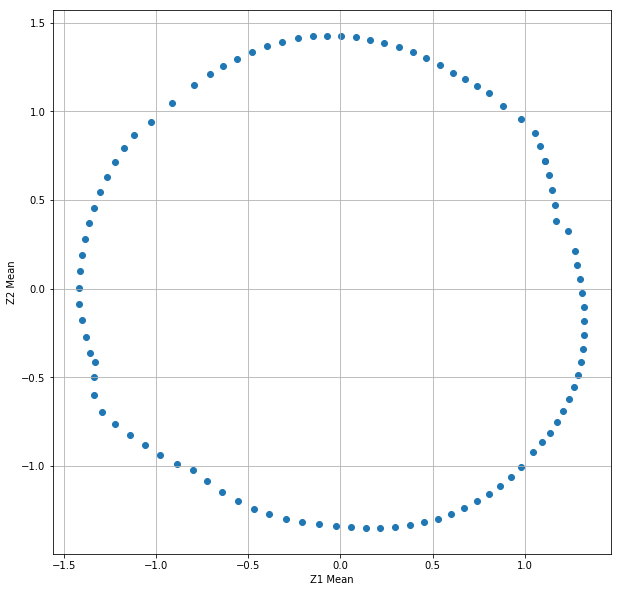

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(prediction[:,0],prediction[:,1])
plt.xlabel('Z1 Mean')
plt.ylabel('Z2 Mean')
plt.grid()
plt.show()


In [31]:
autoencoded = vae.autoencode(signals, weights_folder)

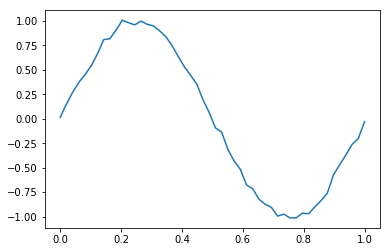

In [33]:
plt.plot(time_range, autoencoded[0])
plt.show()

**To do:**
- Use Dataset class from tensorboard to define the data in order to incorporate both shuffle and bath size.
- Add the possibility to train with heat kernel
